In [1]:
import time
import random


def generate_sensor_data():
    ''' method that randomly generates three variables '''
    temperature = round(random.uniform(-25.0, 90.0), 2)  # Temperature in Celsius
    humidity = round(random.uniform(0.0, 100.0), 2)  # Relative Humidity in %age
    co2_ppm = round(random.uniform(100, 2800), 2)  # CO2 concentration in PPM
    return temperature, humidity, co2_ppm

def simulate_sensor_readings(interval=2, duration=20):
    """
    Simulate sensor readings at regular intervals.
    :param interval: Time interval between readings in seconds.
    :param duration: Total duration to run the simulation in seconds.
    """
    start_time = time.time()
    while time.time() - start_time < duration:
        temp, hum, co2 = generate_sensor_data()
        print(f"Temperature: {temp}°C, Humidity: {hum}%, CO2: {co2} PPM")
        time.sleep(interval)

In [2]:
simulate_sensor_readings(interval=2, duration=20)

Temperature: 27.29°C, Humidity: 29.63%, CO2: 160.85 PPM
Temperature: 4.25°C, Humidity: 4.27%, CO2: 2525.81 PPM
Temperature: 1.27°C, Humidity: 54.11%, CO2: 1107.83 PPM
Temperature: 7.85°C, Humidity: 73.42%, CO2: 421.6 PPM
Temperature: 54.35°C, Humidity: 5.95%, CO2: 1281.43 PPM
Temperature: -1.58°C, Humidity: 97.03%, CO2: 2364.86 PPM
Temperature: 10.93°C, Humidity: 21.0%, CO2: 1553.12 PPM
Temperature: -1.87°C, Humidity: 12.31%, CO2: 516.82 PPM
Temperature: 47.3°C, Humidity: 87.5%, CO2: 1707.57 PPM
Temperature: -10.09°C, Humidity: 87.13%, CO2: 414.13 PPM


In [3]:
# Data to be stored
data = [
    {"Temperature": 50.75, "Humidity": 39.87, "CO2": 2496.69},
    {"Temperature": 14.0, "Humidity": 46.39, "CO2": 1523.52},
    {"Temperature": -12.57, "Humidity": 18.86, "CO2": 2674.05},
    {"Temperature": 11.42, "Humidity": 14.21, "CO2": 541.71},
    {"Temperature": 28.13, "Humidity": 96.38, "CO2": 1009.64},
    {"Temperature": 43.31, "Humidity": 16.59, "CO2": 1889.93},
    {"Temperature": 6.81, "Humidity": 67.6, "CO2": 1514.68},
    {"Temperature": -1.09, "Humidity": 85.43, "CO2": 1860.09},
    {"Temperature": 47.41, "Humidity": 16.61, "CO2": 2728.38},
    {"Temperature": 77.77, "Humidity": 1.4, "CO2": 1114.14}
]

In [4]:
import csv
# Store data in a CSV file
filename = "sensor_data.csv"
with open(filename, "w", newline="") as file:
    writer = csv.DictWriter(file, fieldnames=["Temperature", "Humidity", "CO2"])
    writer.writeheader()  # Write the header i.e., to describe the contents
    writer.writerows(data)  # Write the data

print(f"Data stored in {filename}")

Data stored in sensor_data.csv


In [5]:
import pandas as pd
''' Load the data into a Pandas DataFrame and do fundamental analysis'''
df = pd.read_csv(filename)

# Calculate the average values of Temperature, Humidity, and CO2
average_temperature = df["Temperature"].mean()
average_humidity = df["Humidity"].mean()
average_co2 = df["CO2"].mean()

print("\nAverage Sensor Values:")
print(f"Temperature: {average_temperature:.2f} °C")
print(f"Humidity: {average_humidity:.2f} %")
print(f"CO2: {average_co2:.2f} PPM")

# Find the maximum and minimum temperature
max_temperature = df["Temperature"].max()
min_temperature = df["Temperature"].min()
print(f"\nMaximum Temperature: {max_temperature} °C")
print(f"Minimum Temperature: {min_temperature} °C")

# Find the highest CO2 level recorded
max_co2 = df["CO2"].max()
print(f"\nMaximum CO2 level recorded: {max_co2} PPM")

# Find the lowest humidity recorded
min_humidity = df["Humidity"].min()
print(f"Lowest Humidity: {min_humidity} %")

# Identify outliers (for example, temperatures below 0°C or CO2 above 2500 PPM)
outliers_temp = df[df["Temperature"] < 0]
outliers_co2 = df[df["CO2"] > 2500]

print("\nOutliers (Temperatures below 0°C):")
print(outliers_temp)

print("\nOutliers (CO2 levels above 2500 PPM):")
print(outliers_co2)


Average Sensor Values:
Temperature: 26.59 °C
Humidity: 40.33 %
CO2: 1735.28 PPM

Maximum Temperature: 77.77 °C
Minimum Temperature: -12.57 °C

Maximum CO2 level recorded: 2728.38 PPM
Lowest Humidity: 1.4 %

Outliers (Temperatures below 0°C):
   Temperature  Humidity      CO2
2       -12.57     18.86  2674.05
7        -1.09     85.43  1860.09

Outliers (CO2 levels above 2500 PPM):
   Temperature  Humidity      CO2
2       -12.57     18.86  2674.05
8        47.41     16.61  2728.38


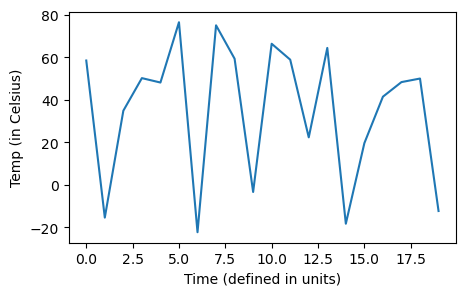

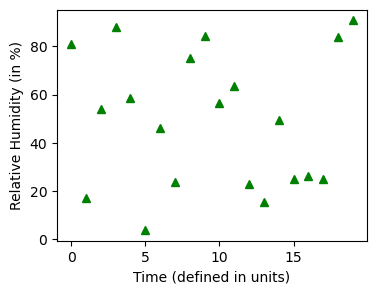

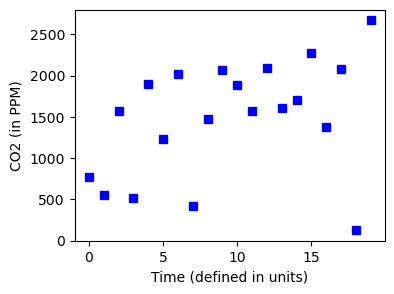

In [6]:
''' Read the data from method and save to a list '''
import matplotlib.pyplot as plt
temp_list = []
hum_list = []
co2_list = []
# generate 20 values for each
for i in range(0,20):
    t, h, c = generate_sensor_data()
    temp_list.append(t)
    hum_list.append(h)
    co2_list.append(c)

''' Use plot to visulize the data'''
plt.figure(figsize=(5, 3))
plt.plot(temp_list)
plt.xlabel('Time (defined in units)')
plt.ylabel('Temp (in Celsius)')
plt.show()

plt.figure(figsize=(4, 3))
plt.plot(hum_list,'g^')
plt.xlabel('Time (defined in units)')
plt.ylabel('Relative Humidity (in %)')
plt.show()

''' Use plot to visulize the data'''
plt.figure(figsize=(4, 3))
plt.plot(co2_list,'bs')
plt.xlabel('Time (defined in units)')
plt.ylabel('CO2 (in PPM)')
plt.show()


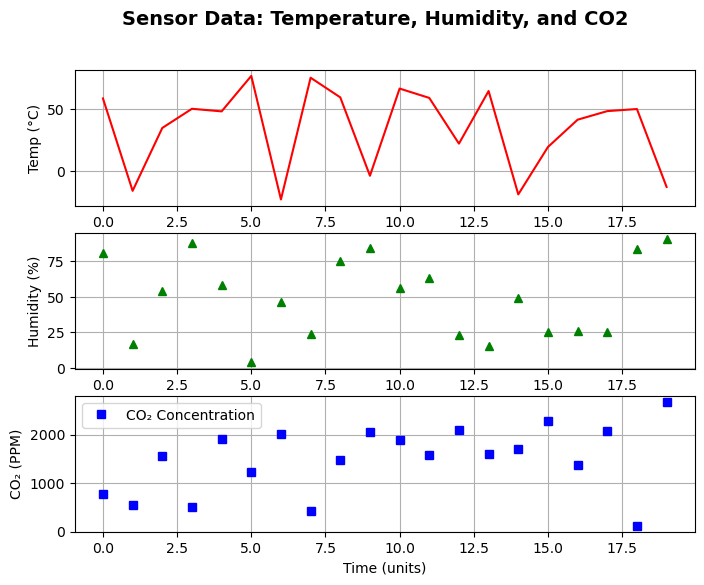

In [7]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(8, 6))  
# Title for the entire figure
plt.suptitle('Sensor Data: Temperature, Humidity, and CO2', fontsize=14, fontweight='bold')
# First subplot: Temperature
plt.subplot(3, 1, 1)  # 3 rows, 1 column, first plot
plt.plot(temp_list, 'r-', label='Temperature')  # Red line
plt.xlabel('Time (units)')
plt.ylabel('Temp (°C)')
plt.grid(True)
# Second subplot: Humidity
plt.subplot(3, 1, 2)  # 3 rows, 1 column, second plot
plt.plot(hum_list, 'g^', label='Humidity')  # Green triangles
plt.xlabel('Time (units)')
plt.ylabel('Humidity (%)')
plt.grid(True)
# Third subplot: CO2 Concentration
plt.subplot(3, 1, 3)  # 3 rows, 1 column, third plot
plt.plot(co2_list, 'bs', label='CO₂ Concentration')  # Blue squares
plt.xlabel('Time (units)')
plt.ylabel('CO₂ (PPM)')
plt.grid(True)
plt.legend()

# Show the plots
plt.show()


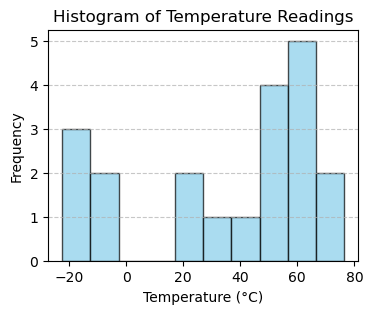

In [8]:
""" Histogram plot for better visualization of overall distribution of the data"""
import matplotlib.pyplot as plt
# Create histogram
plt.figure(figsize=(4, 3))  # Set figure size
plt.hist(temp_list, bins=10, color='skyblue', edgecolor='black', alpha=0.7)

# Labels and title
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.title("Histogram of Temperature Readings")
# Grid for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Show the plot
plt.show()


In [13]:
from datetime import datetime
import logging
# Configure logging
logging.basicConfig(
    filename="sensor_alarms.log",
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s",
    datefmt="%Y-%m-%d %H:%M:%S"
)
# Define threshold limits for alarms for Automated Alerts
TEMP_THRESHOLD = 50  # Degrees Celsius
HUMIDITY_THRESHOLD = 80  # Percentage
CO2_THRESHOLD = 1000  # ppm
def log_alarm(sensor_type, value, threshold):
    """Logs an alarm if the sensor value exceeds the threshold."""
    message = f"{sensor_type} Alarm! Value: {value}, Threshold: {threshold}"
    logging.warning(message)
    print(message)
# run 20 iterations to get data
for i in range(0,20):
    temp, humidity, co2 = generate_sensor_data()
    # Check for alarms
    if temp > TEMP_THRESHOLD:
        log_alarm("Temperature", temp, TEMP_THRESHOLD)
    if humidity > HUMIDITY_THRESHOLD:
        log_alarm("Humidity", humidity, HUMIDITY_THRESHOLD)
    if co2 > CO2_THRESHOLD:
        log_alarm("CO₂", co2, CO2_THRESHOLD)   


Temperature Alarm! Value: 73.53, Threshold: 50
CO₂ Alarm! Value: 1656.07, Threshold: 1000
Humidity Alarm! Value: 82.65, Threshold: 80
CO₂ Alarm! Value: 1357.53, Threshold: 1000
CO₂ Alarm! Value: 2007.14, Threshold: 1000
CO₂ Alarm! Value: 1690.54, Threshold: 1000
Temperature Alarm! Value: 88.54, Threshold: 50
CO₂ Alarm! Value: 2527.89, Threshold: 1000
Humidity Alarm! Value: 88.85, Threshold: 80
CO₂ Alarm! Value: 2390.24, Threshold: 1000
CO₂ Alarm! Value: 1288.0, Threshold: 1000
Temperature Alarm! Value: 77.79, Threshold: 50
Humidity Alarm! Value: 80.89, Threshold: 80
CO₂ Alarm! Value: 2033.5, Threshold: 1000
CO₂ Alarm! Value: 1701.35, Threshold: 1000
Temperature Alarm! Value: 86.84, Threshold: 50
Humidity Alarm! Value: 87.77, Threshold: 80
CO₂ Alarm! Value: 2753.3, Threshold: 1000
Humidity Alarm! Value: 96.66, Threshold: 80
CO₂ Alarm! Value: 1300.76, Threshold: 1000
CO₂ Alarm! Value: 1560.56, Threshold: 1000
Temperature Alarm! Value: 71.72, Threshold: 50
CO₂ Alarm! Value: 1718.77, Thres